In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import csv
import json 

In [2]:
url="https://api.covid19api.com/dayone/country/united-states"
response = requests.get(url).json()
#print(json.dumps(response, indent=4, sort_keys=True))
df = pd.DataFrame(response)

In [3]:
df.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,United States of America,US,Washington,King,53033,47.49,-121.83,1,0,0,0,2020-01-23T00:00:00Z
1,United States of America,US,Washington,King,53033,47.49,-121.83,1,0,0,0,2020-01-24T00:00:00Z
2,United States of America,US,Illinois,Cook,17031,41.84,-87.82,1,0,0,0,2020-01-24T00:00:00Z
3,United States of America,US,Illinois,Cook,17031,41.84,-87.82,1,0,0,0,2020-01-25T00:00:00Z
4,United States of America,US,Washington,King,53033,47.49,-121.83,1,0,0,0,2020-01-25T00:00:00Z


In [5]:
df.loc[(df["City"] == "Mecklenburg") & (df["Province"] == "North Carolina")].head(50)

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
1070,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,2,0,0,0,2020-03-12T00:00:00Z
1475,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,1,0,0,0,2020-03-13T00:00:00Z
1969,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,2,0,0,0,2020-03-14T00:00:00Z
2033,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,4,0,0,0,2020-03-15T00:00:00Z
2663,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,7,0,0,0,2020-03-16T00:00:00Z
3234,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,11,0,0,0,2020-03-17T00:00:00Z
3414,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,14,0,0,0,2020-03-18T00:00:00Z
4332,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,30,0,0,0,2020-03-19T00:00:00Z
5520,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,43,0,0,0,2020-03-20T00:00:00Z
5827,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,77,0,0,0,2020-03-21T00:00:00Z


In [7]:
df_NC = df.loc[(df["Province"] == "North Carolina")]
df_NC

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
343,United States of America,US,North Carolina,Wake,37183,35.79,-78.65,1,0,0,0,2020-03-03T00:00:00Z
384,United States of America,US,North Carolina,Wake,37183,35.79,-78.65,1,0,0,0,2020-03-04T00:00:00Z
425,United States of America,US,North Carolina,Wake,37183,35.79,-78.65,1,0,0,0,2020-03-05T00:00:00Z
437,United States of America,US,North Carolina,Wake,37183,35.79,-78.65,1,0,0,0,2020-03-06T00:00:00Z
438,United States of America,US,North Carolina,Chatham,37037,35.7,-79.26,1,0,0,0,2020-03-06T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...
71510,United States of America,US,North Carolina,Stokes,37169,36.4,-80.24,10,0,0,0,2020-04-19T00:00:00Z
71511,United States of America,US,North Carolina,Surry,37171,36.42,-80.69,17,0,0,0,2020-04-19T00:00:00Z
71512,United States of America,US,North Carolina,Transylvania,37175,35.2,-82.8,7,0,0,0,2020-04-19T00:00:00Z
71513,United States of America,US,North Carolina,Tyrrell,37177,35.87,-76.17,4,0,0,0,2020-04-19T00:00:00Z


In [31]:
Max_date = df_NC["Date"].max()
df_date=df_NC.loc[(df_NC["Date"] == Max_date)]
df_date


,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
71224,United States of America,US,North Carolina,Alamance,37001,36.04,-79.4,50,0,0,0,2020-04-19T00:00:00Z
71225,United States of America,US,North Carolina,Alexander,37003,35.92,-81.18,3,0,0,0,2020-04-19T00:00:00Z
71226,United States of America,US,North Carolina,Alleghany,37005,36.49,-81.13,2,0,0,0,2020-04-19T00:00:00Z
71227,United States of America,US,North Carolina,Anson,37007,34.97,-80.1,16,0,0,0,2020-04-19T00:00:00Z
71228,United States of America,US,North Carolina,Ashe,37009,36.43,-81.5,4,0,0,0,2020-04-19T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...
71510,United States of America,US,North Carolina,Stokes,37169,36.4,-80.24,10,0,0,0,2020-04-19T00:00:00Z
71511,United States of America,US,North Carolina,Surry,37171,36.42,-80.69,17,0,0,0,2020-04-19T00:00:00Z
71512,United States of America,US,North Carolina,Transylvania,37175,35.2,-82.8,7,0,0,0,2020-04-19T00:00:00Z
71513,United States of America,US,North Carolina,Tyrrell,37177,35.87,-76.17,4,0,0,0,2020-04-19T00:00:00Z


In [32]:
df_date.to_csv("Covid_NC_data.csv",index = False)

In [ ]:
df_group_by_city = df1.groupby('City')
df_group_by_city.count()

In [ ]:
#x_axis = df.loc[(df["City"] == "Mecklenburg") & (df["Province"] == "North Carolina")].Date
x_axis = df.loc[(df["Province"] == "North Carolina")].Date
#y_axis = df.loc[(df["City"] == "Mecklenburg") & (df["Province"] == "North Carolina")].City
y_axis = df.loc[(df["Province"] == "North Carolina")].City

In [ ]:

plt.scatter(x_axis,y_axis)

In [16]:
df["City"]

0            King
1            King
2            Cook
3            Cook
4            King
           ...   
72190    Franklin
72191      Fulton
72192      Gilmer
72193       Glynn
72194            
Name: City, Length: 72195, dtype: object

In [20]:
Top_10_confirmed_data =df_date.sort_values('Confirmed',ascending=False).head(10)
Top_10_confirmed_data

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
68424,United States of America,US,North Carolina,Mecklenburg,37119,35.24,-80.83,1153,24,0,0,2020-04-18T00:00:00Z
68430,United States of America,US,North Carolina,Wake,37183,35.79,-78.65,579,4,0,0,2020-04-18T00:00:00Z
68375,United States of America,US,North Carolina,Durham,37063,36.04,-78.88,399,4,0,0,2020-04-18T00:00:00Z
68434,United States of America,US,North Carolina,Wayne,37191,35.36,-78,378,4,0,0,2020-04-18T00:00:00Z
68396,United States of America,US,North Carolina,Rowan,37159,35.64,-80.52,244,12,0,0,2020-04-18T00:00:00Z
68217,United States of America,US,North Carolina,Cabarrus,37025,35.39,-80.55,207,4,0,0,2020-04-18T00:00:00Z
68444,United States of America,US,North Carolina,Orange,37135,36.06,-79.12,183,3,0,0,2020-04-18T00:00:00Z
68407,United States of America,US,North Carolina,Guilford,37081,36.08,-79.79,176,13,0,0,2020-04-18T00:00:00Z
68428,United States of America,US,North Carolina,Union,37179,34.99,-80.53,141,3,0,0,2020-04-18T00:00:00Z
68377,United States of America,US,North Carolina,Forsyth,37067,36.13,-80.25,126,5,0,0,2020-04-18T00:00:00Z


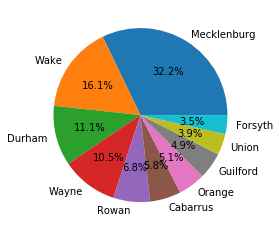

In [25]:
Confirmed_data =Top_10_confirmed_data['Confirmed']
Confirmed_data
labels= Top_10_confirmed_data['City']
plt.pie(Confirmed_data,labels=labels,autopct="%1.1f%%")
plt.show()
#pie_1 = Confirmed_data.plot(kind = 'pie',autopct="%1.1f%%")